<a href="https://colab.research.google.com/github/prupat/learning-python-2896241/blob/main/CIS_9650_Final_Project_Group_3_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive

In [3]:
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
# Importing the necessary libraries.
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go

In [5]:
#read df1
df1= pd.read_csv("/content/drive/MyDrive/Colab Notebooks/DATASET 1_GPROJECT_RAW DATA.csv")
df1.head()

,Offense Type,Report Date,Incident Precinct Code,Borough Name,Intimate Relationship Flag,Victim Race,Victim Sex,Victim Reported Age,Suspect Race,Suspect Sex,Suspect Reported Age,COMMDIST,Poverty,Median Income,Unemployment
0,FELONY ASSAULT,1/1/2020,40,BRONX,No,WHITE HISPANIC,FEMALE,31.0,WHITE HISPANIC,MALE,36.0,201.0,1.0,1.0,1.0
1,FELONY ASSAULT,1/1/2020,44,BRONX,Yes,WHITE HISPANIC,FEMALE,36.0,BLACK HISPANIC,MALE,44.0,204.0,1.0,1.0,1.0
2,FELONY ASSAULT,1/1/2020,41,BRONX,Yes,WHITE HISPANIC,MALE,67.0,WHITE HISPANIC,FEMALE,52.0,202.0,1.0,1.0,1.0
3,DIR,1/1/2020,42,BRONX,YES,WHITE,FEMALE,NaN,NaN,MALE,NaN,203.0,1.0,1.0,1.0
4,DIR,1/1/2020,48,BRONX,YES,WHITE,FEMALE,NaN,NaN,MALE,NaN,206.0,1.0,1.0,1.0


In [6]:
#displaying the number of rows and columns
df1.shape

(483790, 15)

In [7]:
# List of columns to be removed
columns_to_remove = ['Unemployment', 'Suspect Reported Age', 'Victim Reported Age','Incident Precinct Code','Intimate Relationship Flag','Median Income','COMMDIST','Incident Precinct Code','Victim Race','Victim Sex','Suspect Race','Suspect Sex','Poverty']

# Dropping columns from that are not needed for analysis.
df1.drop(columns_to_remove, axis=1, inplace=True)

In [8]:
# Converting the 'Report Date' column in DataFrame df1 to datetime format
df1['Report Date'] = pd.to_datetime(df1['Report Date'])


In [9]:
# Displaying unique values in the 'Borough Name'column of df2
df1['Borough Name'].unique()

array(['BRONX', 'BROOKLYN', 'MANHATTAN', 'QUEENS', 'STATEN ISLAND'],
      dtype=object)

In [10]:
# Displaying the first 5 rows of df1.
df1.head(5)

,Offense Type,Report Date,Borough Name
0,FELONY ASSAULT,2020-01-01,BRONX
1,FELONY ASSAULT,2020-01-01,BRONX
2,FELONY ASSAULT,2020-01-01,BRONX
3,DIR,2020-01-01,BRONX
4,DIR,2020-01-01,BRONX


In [11]:
df2=pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Raw Data.csv")
df2.head()

,Year,Month,Area Name,Adjusted,Measure Names,Measure Values
0,2023,January,Bronx County,Not Seasonally Adjusted,Unemployment Rate,7.5
1,2023,January,Bronx County,Not Seasonally Adjusted,Labor Force,607200.0
2,2023,January,Bronx County,Not Seasonally Adjusted,Unemployed,45700.0
3,2023,January,Bronx County,Not Seasonally Adjusted,Employed,561500.0
4,2023,January,Kings County,Not Seasonally Adjusted,Unemployment Rate,5.7


In [12]:
# Remove rows where Measure Names is 'Unemployed' and drop the Measure Names column
df2.drop(df2[df2['Measure Names'] == 'Unemployed'].index, inplace=True)
df2.reset_index(drop=True, inplace=True)

In [13]:
# Drop the "Measure Names" column
df2.drop(columns='Measure Names', inplace=True)

In [14]:
# Replace the column name "Measure Values" with "Unemployment rate"
df2.rename(columns={'Measure Values': 'Unemployment rate'}, inplace=True)

In [15]:
# Renaming the column "Area Name" in df2 to match the column name in df1.
df2.rename(columns={"Area Name": "Borough Name"}, inplace=True)

In [16]:
# Displaying unique values in the 'Borough Name'column of df2
df2['Borough Name'].unique()

array(['Bronx County', 'Kings County', 'New York County', 'Queens County',
       'Richmond County'], dtype=object)

In [17]:
# Mapping borough names in df2 to match the names in df1
mapping = {
    'Bronx County': 'BRONX',
    'Kings County': 'BROOKLYN',
    'New York County': 'MANHATTAN',
    'Queens County': 'QUEENS',
    'Richmond County': 'STATEN ISLAND'
}

df2['Borough Name'] = df2['Borough Name'].map(mapping)

In [18]:
df2.head()

,Year,Month,Borough Name,Adjusted,Unemployment rate
0,2023,January,BRONX,Not Seasonally Adjusted,7.5
1,2023,January,BRONX,Not Seasonally Adjusted,607200.0
2,2023,January,BRONX,Not Seasonally Adjusted,561500.0
3,2023,January,BROOKLYN,Not Seasonally Adjusted,5.7
4,2023,January,BROOKLYN,Not Seasonally Adjusted,1217200.0


In [19]:
# Convert "Year" and "Month" columns to datetime format with the specified format
df2['Report Date'] = pd.to_datetime(df2['Year'].astype(str) + '-' + df2['Month'], format='%Y-%B')

# Drop the 'Year' and 'Month' columns
df2.drop(columns=['Year', 'Month'], inplace=True)
df2.head()

,Borough Name,Adjusted,Unemployment rate,Report Date
0,BRONX,Not Seasonally Adjusted,7.5,2023-01-01
1,BRONX,Not Seasonally Adjusted,607200.0,2023-01-01
2,BRONX,Not Seasonally Adjusted,561500.0,2023-01-01
3,BROOKLYN,Not Seasonally Adjusted,5.7,2023-01-01
4,BROOKLYN,Not Seasonally Adjusted,1217200.0,2023-01-01


In [20]:
# Inner Merge on Borouh and Date columns
merged_df = pd.merge(df1, df2, on=['Borough Name', 'Report Date'], how='inner')


In [21]:
#displaying the number of rows and columns
merged_df.shape

(46635, 5)

In [22]:
# Display information about the merged dataframe, including data types and non-null counts
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 46635 entries, 0 to 46634
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   Offense Type       46635 non-null  object        
 1   Report Date        46635 non-null  datetime64[ns]
 2   Borough Name       46635 non-null  object        
 3   Adjusted           46635 non-null  object        
 4   Unemployment rate  46635 non-null  float64       
dtypes: datetime64[ns](1), float64(1), object(3)
memory usage: 1.8+ MB


In [23]:
# Check for missing values
merged_df.isnull().sum()

Offense Type         0
Report Date          0
Borough Name         0
Adjusted             0
Unemployment rate    0
dtype: int64

In [24]:
# Count the number of duplicated rows
num_duplicates = merged_df.duplicated().sum()

# Print the number of duplicated rows
print("Number of duplicated rows:", num_duplicates)

Number of duplicated rows: 45882


In [25]:
# Drop the duplicated rows from the DataFrame
merged_df.drop_duplicates(inplace=True)

In [26]:
merged_df.head(5)

,Offense Type,Report Date,Borough Name,Adjusted,Unemployment rate
0,FELONY ASSAULT,2020-02-01,BRONX,Not Seasonally Adjusted,5.7
1,FELONY ASSAULT,2020-02-01,BRONX,Not Seasonally Adjusted,631700.0
2,FELONY ASSAULT,2020-02-01,BRONX,Not Seasonally Adjusted,595700.0
15,DIR,2020-02-01,BRONX,Not Seasonally Adjusted,5.7
16,DIR,2020-02-01,BRONX,Not Seasonally Adjusted,631700.0


In [27]:
merged_df = merged_df[merged_df['Report Date'].dt.year != 2019]

In [28]:
merged_df.shape

(753, 5)

In [29]:
merged_df.to_csv('merged_data.csv', index=False)

In [30]:
#summary statistics for numeric variables
merged_df.describe().transpose()

,count,mean,min,25%,50%,75%,max,std
Report Date,753,2021-01-09 14:37:46.135458048,2020-02-01 00:00:00,2020-08-01 00:00:00,2021-01-01 00:00:00,2021-07-01 00:00:00,2021-12-01 00:00:00,NaN
Unemployment rate,753.0,537865.094555,3.7,14.3,584500.0,996500.0,1271800.0,465656.712676


In [31]:
# Counting the number of occurrences of different offense types in each borough over the years.

# Convert 'Report Date' to datetime format
merged_df['Report Date'] = pd.to_datetime(merged_df['Report Date'])

# Extract year from 'Report Date'
merged_df['Year'] = merged_df['Report Date'].dt.year

# Group by 'Borough Name' and 'Year', then count occurrences of 'Offense Type'
crime_counts = merged_df.groupby(['Borough Name', 'Year'])['Offense Type'].count().reset_index(name='Count')

print(crime_counts)

    Borough Name  Year  Count
0          BRONX  2020     75
1          BRONX  2021     87
2       BROOKLYN  2020     78
3       BROOKLYN  2021     84
4      MANHATTAN  2020     63
5      MANHATTAN  2021     87
6         QUEENS  2020     72
7         QUEENS  2021     96
8  STATEN ISLAND  2020     57
9  STATEN ISLAND  2021     54


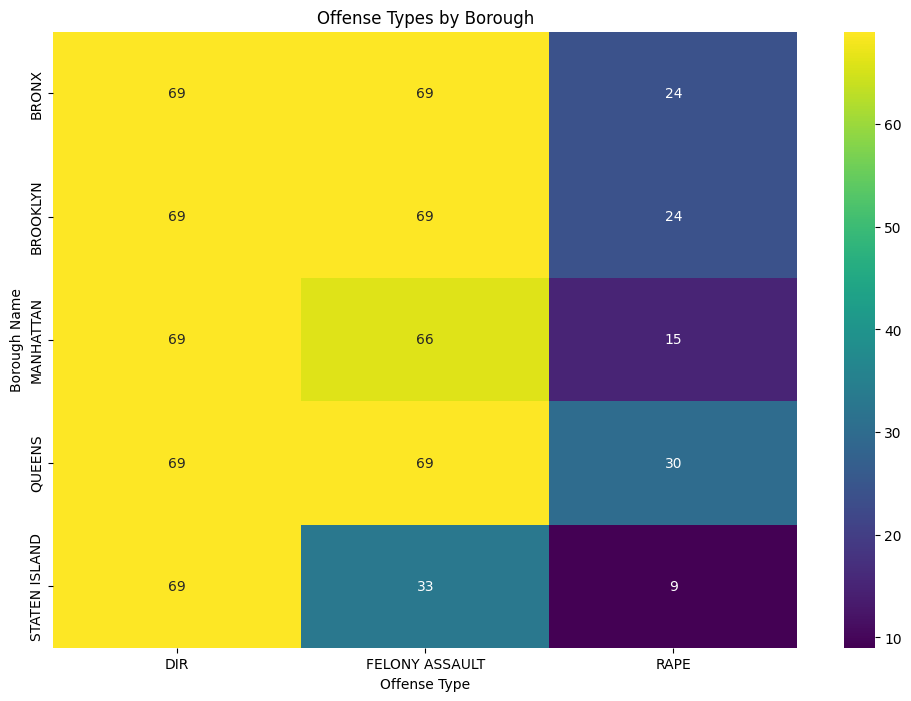

In [32]:
#creates a cross-tabulation of offense types by borough and visualizes it using a heatmap.
#The heatmap displays the frequency of each offense type across different boroughs.
cross_tab = pd.crosstab(merged_df['Borough Name'], merged_df['Offense Type'])

#heatmap
plt.figure(figsize=(12, 8))
sb.heatmap(cross_tab, cmap='viridis', annot=True, fmt='d')
plt.title('Offense Types by Borough')
plt.xlabel('Offense Type')
plt.ylabel('Borough Name')
plt.show()

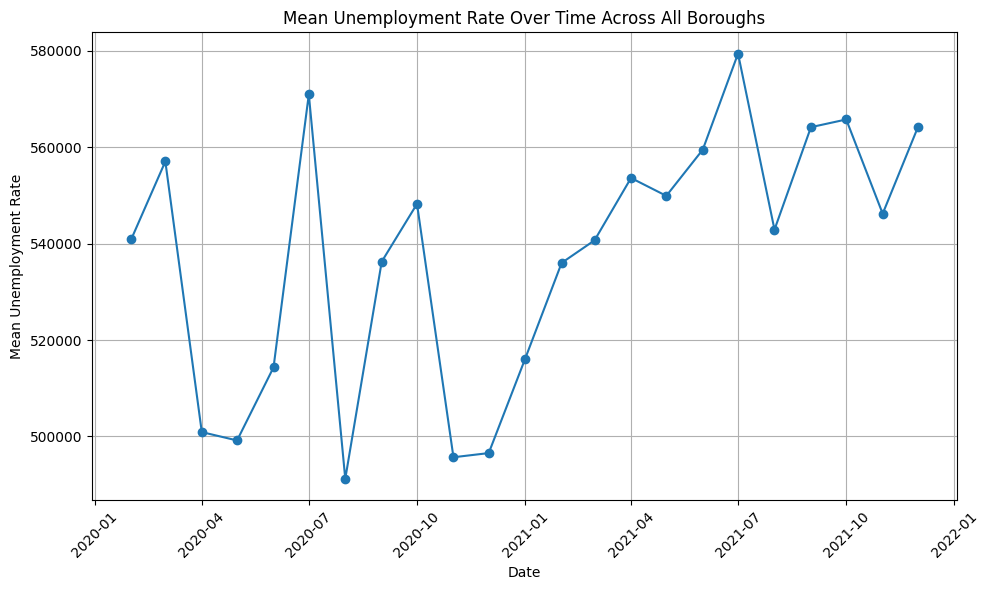

In [33]:
# Visualizing the mean unemployment rate over time across all boroughs.

# Sort the DataFrame by Report Date
merged_df_sorted = merged_df.sort_values(by='Report Date')

# Group by 'Report Date' and calculate the mean unemployment rate
mean_unemployment = merged_df_sorted.groupby('Report Date')['Unemployment rate'].mean()

# Plot the mean unemployment rate over time
plt.figure(figsize=(10, 6))
plt.plot(mean_unemployment.index, mean_unemployment.values, marker='o')
plt.title('Mean Unemployment Rate Over Time Across All Boroughs')
plt.xlabel('Date')
plt.ylabel('Mean Unemployment Rate')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

In [34]:
# Visualizing the unemployment rate over months by borough.

# Convert 'Unemployment rate' to numeric
merged_df['Unemployment rate'] = pd.to_numeric(merged_df['Unemployment rate'], errors='coerce')

# Extract month from 'Report Date'
merged_df['Month'] = merged_df['Report Date'].dt.month

# Aggregate the data by taking the mean unemployment rate for each month and borough
agg_df = merged_df.groupby(['Month', 'Borough Name']).agg({'Unemployment rate': 'mean'}).reset_index()

# Create a line graph using Plotly
fig = px.line(agg_df, x='Month', y='Unemployment rate', color='Borough Name',
              title='Unemployment Rate Over Months by Borough',
              labels={'Unemployment rate': 'Mean Unemployment Rate', 'Month': 'Month'})

# Show the plot
fig.show()

In [35]:
#comparison of crime counts between the years 2020 and 2021 for each borough.

fig = px.bar(crime_counts, x='Year', y='Count', color='Borough Name',
             title='Comparison of Crime Counts by Borough for 2020 and 2021',
             labels={'Count': 'Number of Offenses'},
             barmode='group')

# Update layout
fig.update_layout(xaxis_title='Year', yaxis_title='Number of Offenses')

# Show the plot
fig.show()

In [36]:
# Visualizing the count of offenses by borough and month
merged_df['Report Date'] = pd.to_datetime(merged_df['Report Date'])

# Extract month from 'Report Date'
merged_df['Month'] = merged_df['Report Date'].dt.month

# Group by 'Borough Name' and 'Month', then count occurrences of 'Offense Type'
crime_counts_monthly = merged_df.groupby(['Borough Name', 'Month'])['Offense Type'].count().reset_index(name='Count')

# Plot the bar chart using Plotly Express
fig = px.bar(crime_counts_monthly, x='Month', y='Count', color='Borough Name',
             title='Count of Offenses by Borough and Month',
             labels={'Count': 'Number of Offenses', 'Month': 'Month (1-12)'},
             barmode='group')

# Update layout
fig.update_layout(xaxis_title='Month', yaxis_title='Number of Offenses')

# Show the plot
fig.show()

In [37]:
# Visualizing the relationship between unemployment rate and crime count, with a trendline.

# Group the data by 'Unemployment rate' and count the occurrences of each rate
agg_df = merged_df.groupby('Unemployment rate')['Offense Type'].count().reset_index(name='Count')

# Create scatter plot using Plotly and fit a trendline
fig = px.scatter(agg_df, x='Unemployment rate', y='Count',
                 title='Count of Crimes vs Unemployment Rate',
                 trendline='ols',  # Ordinary Least Squares regression line
                 labels={'Unemployment rate': 'Unemployment Rate', 'Count': 'Count of Crimes'})

# Show plot
fig.show()

In [38]:
# Count the occurrences of each unique row to represent the count of crimes
agg_df = merged_df.groupby(['Offense Type', 'Report Date', 'Borough Name', 'Unemployment rate']).size().reset_index(name='Count of Crimes')

# Group the data by 'Unemployment rate' and sum the count of crimes for each rate
agg_df = agg_df.groupby('Unemployment rate')['Count of Crimes'].sum().reset_index()

# Create scatter plot using Plotly and fit a trendline
fig = px.scatter(agg_df, x='Unemployment rate', y='Count of Crimes',
                 title='Count of Crimes vs Unemployment Rate',
                 trendline='ols',  # Ordinary Least Squares regression line
                 labels={'Unemployment rate': 'Unemployment Rate', 'Count of Crimes': 'Count of Crimes'})

# Show plot
fig.show()

In [39]:
# Group the data by 'Unemployment rate' and count the total occurrences of each rate
agg_df = merged_df.groupby('Unemployment rate')['Offense Type'].count().reset_index(name='Total Count')

# Calculate the crime rate relative to the total count of crimes for each unemployment rate
agg_df['Crime Rate'] = agg_df['Total Count'] / agg_df['Total Count'].sum()

# Create scatter plot using Plotly
fig = px.scatter(agg_df, x='Unemployment rate', y='Crime Rate',
                 title='Relative Crime Rate vs Unemployment Rate',
                 trendline='ols',  # Ordinary Least Squares regression line
                 labels={'Unemployment rate': 'Unemployment Rate', 'Crime Rate': 'Relative Crime Rate'})

# Show plot
fig.show()